Area_A = 0.571 m^2
Area_B = 0.763 m^2
total mass = 4.385 gram


(0.0, 1.0)

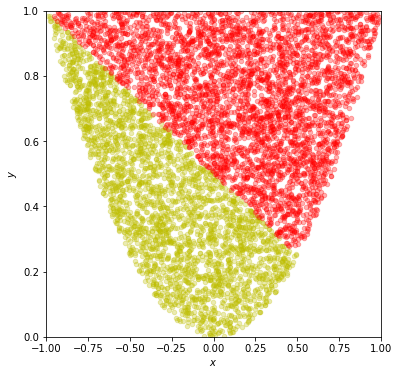

In [15]:
import numpy
import matplotlib.pyplot as plt

N = 10000
inside_A = []

inside_B = []


for i in range(N):
    x = numpy.random.uniform(-1, 1)
    y = numpy.random.uniform(0, 1)
    pos = (x,y)
    #if numpy.sqrt(x**2 + y**2) < 1:
    condition1 = y > x**2.
    condition2 = y < -0.5 * x + 0.5  
    if condition1 == 1 and condition2 == 1:
        inside_A.append(pos)
    elif condition1 == 1:  # and condition4 == 1:
        inside_B.append(pos)

plt.figure(figsize=(6, 6))
plt.scatter([pos[0] for pos in inside_A], [pos[1] for pos in inside_A],
            color = 'y', marker='o', s = 20, alpha=0.3);


plt.scatter([pos[0] for pos in inside_B], [pos[1] for pos in inside_B],
            color = 'r', marker='o', s = 20, alpha=0.3);
Area_square = 2.0  # m^2
Area_A = Area_square * len(inside_A)/N
Area_B = Area_square * len(inside_B)/N

print ("Area_A = %.3f m^2"%Area_A)
print ("Area_B = %.3f m^2"%Area_B)
mass_density_A = 1.0 # gram/m^2
mass_density_B = 5.0 # gram/m^2

total_mass = Area_A * mass_density_A +  Area_B * mass_density_B
print ("total mass = %.3f gram"%total_mass)
#MC_pi = 4 * len(inside)/float(N)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.xlim([-1,1])
plt.ylim([0,1])
#plt.axis('equal')
#plt.savefig("Unit3.1_MC_Circle.png")  



In [17]:
import numpy
import matplotlib.pyplot as plt

N = 10000
inside = []
for i in range(N):
    x = numpy.random.uniform(-1, 1)
    y = numpy.random.uniform(-1, 1)
    pos = (x,y)
    if numpy.sqrt(x**2 + y**2) < 1:
        inside.append(pos)
        
        


#plt.figure(figsize=(6, 6))
#plt.scatter([pos[0] for pos in inside], [pos[1] for pos in inside], color = 'b', marker='o', s = 20, alpha=0.3);
#MC_pi = 4 * len(inside)/float(N)
#plt.xlabel(r'$x$')
#plt.ylabel(r'$y$')
#plt.xlim([-1,1])
#plt.ylim([-1,1])
#plt.savefig("Unit3.1_MC_Circle.png")  




In [56]:

def MC_Circle_V1(N_total):
    inside = []
    for i in range(N):
        x = numpy.random.uniform(-1, 1)
        y = numpy.random.uniform(-1, 1)
        pos = (x,y)
        if numpy.sqrt(x**2 + y**2) < 1:
            inside.append(pos)
            
    Area_Circle = 4 * len(inside)/float(N)       
    return[Area_Circle]



def MC_Circle_V2(N_total):
    x = numpy.random.uniform(-1, 1,N_total)
    y = numpy.random.uniform(-1, 1,N_total)
    N_inside = sum (x**2 + y**2 <1)  
    N_outside = N_total - N_inside
    Ratio = float(N_inside)/float(N_total)
    #Area_Circle = 4 * float(N_inside)/float(N)
    return[N_total,N_inside,N_outside, Ratio]


n_trial_list = [100,200,150,330,500,1000,50] # the numer of random points used for MC integration

string = 'N_total,N_inside,N_outside,Ratio\n'
for n_trial in n_trial_list:
    [N_total,N_inside,N_outside, Ratio] =  MC_Circle_V2(n_trial)
    string += "%6d\t%6d\t%6d\t%6.2f\n"%(N_total, N_inside,N_outside, Ratio)
print (string)
f = open("abc.txt","w")
f.write(string)
f.close()



N_total,N_inside,N_outside,Ratio
   100	    78	    22	  0.78
   200	   158	    42	  0.79
   150	   122	    28	  0.81
   330	   254	    76	  0.77
   500	   394	   106	  0.79
  1000	   781	   219	  0.78
    50	    38	    12	  0.76



[3.12 3.16 3.24 3.08 3.16 3.12 3.04]


<Figure size 432x288 with 0 Axes>

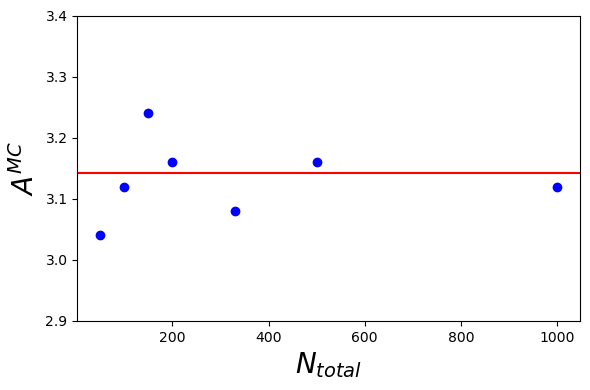

In [61]:
import numpy as np
Data = np.loadtxt("abc.txt", skiprows = 2)
#print (Data)

N_tot = Data[:,0]
N_inside = Data[:,1]
N_outside = Data[:,2]
Ratio = Data[:,3]

#print (N_tot)

Area_square = 4.0 
Area_circle = Area_square * Ratio
print (Area_circle)


#-----
plt.clf()
fig = plt.figure( dpi = 100 ) # set figure resolution, dots per inch
fig.set_size_inches(6,4)
plt.plot(N_tot, Area_circle, 'bo')
plt.axhline(np.pi, color='r');
plt.xlabel(r"$N_{total}$", fontsize = 20)
plt.ylabel(r"$A^{MC} $", fontsize = 20)
plt.ylim(2.9,3.4)
plt.tight_layout()
plt.savefig("Unit3.6_post_analysis.png")






In [74]:

import numpy as np
import pandas as pd


def MC_Integrate(N_total):
    x_array = np.random.uniform(-1,1,N_total) #
    y_array = np.random.uniform(-1,1,N_total)
    N_inside= sum(x_array**2+y_array**2 < 1)
    N_outside = N_total - N_inside
    Ratio = float(N_inside)/N_total
    return [N_total,N_inside,N_outside, Ratio]



n_trial_list = [100,200,150,330,500,1000,50] # the numer of random points used for MC integration


#===
N_total_list = []
N_inside_list = []
N_outside_list = []
Ratio_list = []

for n_trial in n_trial_list:
    [n_total,n_inside,n_outside, ratio] = MC_Integrate(n_trial)
    N_total_list.append(n_total)
    N_inside_list.append(n_inside)
    N_outside_list.append(n_outside)
    Ratio_list.append(ratio)
    #print ("Numer of random points for MC integration =", n_trial)



#==== pandas
my_pd = pd.DataFrame({"N_total": N_total_list,
                      "N_in": N_inside_list,
                      "N_out": N_outside_list,
                      "Ratio": Ratio_list,
                      })

print (my_pd)

#====save dataframe to csv file ====, comma-separated values (csv)

#my_pd.to_csv("abc.csv")
my_pd.to_csv("abc.csv", sep = '\t')





   N_total  N_in  N_out     Ratio
0      100    79     21  0.790000
1      200   156     44  0.780000
2      150   118     32  0.786667
3      330   263     67  0.796970
4      500   375    125  0.750000
5     1000   801    199  0.801000
6       50    38     12  0.760000


<Figure size 432x288 with 0 Axes>

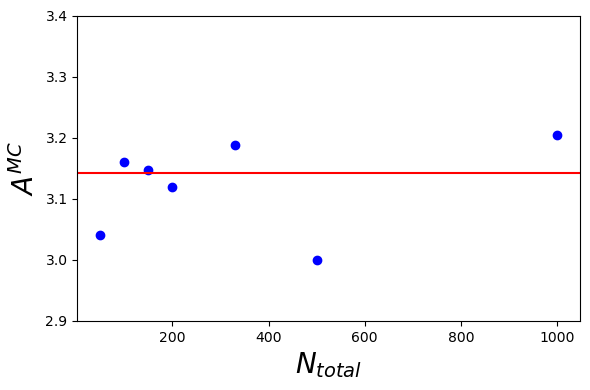

In [80]:

#my_pd = pd.read_csv('abc.csv', sep=',', skiprows=0)
#print (my_pd)

#print (my_pd)
my_pd = pd.read_csv('abc.csv', sep='\s+', skiprows=0)


 
#==== 
N_total = my_pd["N_total"]
N_in = my_pd["N_in"]
N_out = my_pd["N_out"]
Ratio = my_pd["Ratio"]
MC_Area = 4.0 * Ratio

#-----
plt.clf()
fig = plt.figure( dpi = 100 ) # set figure resolution, dots per inch
fig.set_size_inches(6,4)
plt.plot(N_total, MC_Area, 'bo')
plt.axhline(np.pi, color='r');
plt.xlabel(r"$N_{total}$", fontsize = 20)
plt.ylabel(r"$A^{MC} $", fontsize = 20)
plt.ylim(2.9,3.4)
plt.tight_layout()
#plt.savefig("Unit3.8_read_pandas.png")



<Figure size 432x288 with 0 Axes>

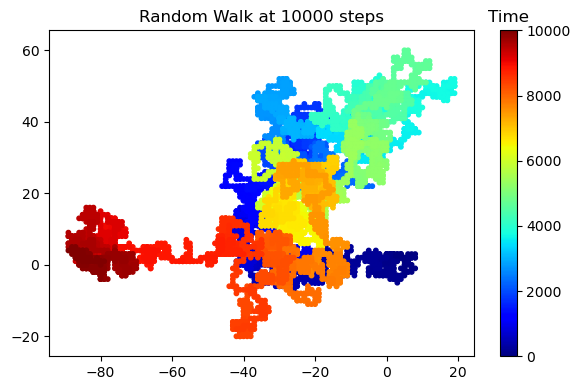

In [89]:
import numpy as np
import matplotlib.pyplot as plt


n_step = 10000

time_array = range(0,n_step)  
x_array = np.zeros(n_step) 
y_array = np.zeros(n_step) 

random_array = np.random.uniform(0,4,n_step) 


for t in time_array: 
    val = random_array[t]
    if val < 1:  # val smaller than 1, right 
        x_array[t] = x_array[t-1] + 1
        y_array[t] = y_array[t-1] 
    elif val < 2:  # val between 1 and 2, left 
        x_array[t] = x_array[t-1] - 1
        y_array[t] = y_array[t-1] 
    elif val < 3: # val between 2 and 3, up
        x_array[t] = x_array[t-1] 
        y_array[t] = y_array[t-1] + 1
    else: # val between 3 and 4, down
        x_array[t] = x_array[t-1] 
        y_array[t] = y_array[t-1] - 1
#=====

#=====
plt.clf()
fig = plt.figure( dpi = 100 ) # set figure resolution, dots per inch
fig.set_size_inches(6,4)
plt.scatter(x_array, y_array, c=time_array, cmap='jet', s= 10)



plt.title("Random Walk at " + str(n_step) + " steps")

plt.clim(0,n_step)
clb = plt.colorbar()
clb.ax.set_title('Time')


plt.axis("equal")
plt.tight_layout()

plt.savefig("Unit_3.9_random_walk.png")


